# Yandex

## Стажировка июнь-август 2021 [Рекламный аналитик]

### Тестовое задание

#### Задание 1 (SQL запрос)

**Исходные данные**
* Таблица 1. orders (order_id, promocode_id) - уникальные заказы
* Таблица 2. promocodes (promocode_id, name, discount) - уникальные промокоды

**Задание**  
Необходимо вывести:  
1) Долю заказов с промокодами

**SQL-запрос**  
`SELECT 
  CAST(
    COUNT(promocode_id) AS REAL
  ) / COUNT(order_id) AS orders_with_promocode_rate 
FROM 
  task1.orders`

**Задание**  
Необходимо вывести:  
2) Самый популярный промокод (название) и число его использований

**SQL-запрос**  

`SELECT 
  r.name AS promocode_name, 
  COUNT(l.order_id) AS promocode_used_times 
FROM 
  task1.orders AS l 
  INNER JOIN task1.promocodes AS r ON l.promocode_id = r.promocode_id 
GROUP BY 
  r.promocode_id 
ORDER BY 
  promocode_used_times DESC 
LIMIT 
  1`

#### Задание 2 (SQL запрос)

**Исходные данные**
* Таблица 1. consumption (coffee_point_id INT, cookies INT)
* Таблица 2. buildings (coffee_point_id INT, coffee_point_name VARCHAR(32), office_id INT, office_name VARCHAR(32))

**Задание**  
Необходимо вывести:  
1) Необходимо вывести топ-10 офисов по потреблению печенек среди офисов, которые потребляют менее 1000 печенек

**SQL-запрос**  
`SELECT 
  r.office_id, 
  r.office_name, 
  SUM(l.cookies) AS cookies_ate 
FROM 
  task2.consumption AS l 
  INNER JOIN task2.buildings AS r ON l.coffee_point_id = r.coffee_point_id 
GROUP BY 
  r.office_id, 
  r.office_name 
HAVING 
  SUM(l.cookies) < 1000 
ORDER BY 
  cookies_ate DESC 
LIMIT 
  10`

#### Задание 3 (анализ данных)

**Исходные данные**  
Клиент: Омега  
Категории: Потребительское кредитование  
Период для анализа: янв – авг 2020  
Цель клиента: получать больше целевых визитов по меньшей стоимости  
Данные для анализа: таблица на Листе data  

**Задание**  
Необходимо на основе данных на Листе data провести анализ рекламного размещения клиента:  
1. оценить текущее положение клиента относительно конкурентов в категории (сравнительный анализ эффективности затрат)
2. на основе выводов из п1 сформировать рекомендации по использованию инструментов, площадок, устройств

**Ожидаемый результат**
* Презентация в pptx с выводами и графиками
* Исходники с расчетами в свободном, но структурированном и читаемом формате (на ваше усмотрение - ссылки на xlsx-файл, data studio, bi и тд)

**Описание столбцов таблицы data:**
* Client – название клиента
* client_id – идентификатор клиента
* Device – тип устройства
* Place – тип площадки
* BannerType – тип объявления
* QueryType – тип запроса (только для Place: Search)
* TargetingType – тип таргетинга
* Shows – Показы
* Clicks – Клики
* Cost_rub_wo_NDS – Расходы
* Conversions – Целевые визиты

**Дополнительная информация**  
Для выполнения задания потребуются базовые знания по Яндекс.Директу.  
Всю информацию можно найти в официальной справке: https://yandex.ru/support/direct/

**Решение**

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

##### Загрузка и подготовка данных

In [2]:
# отображение двух знаков после запятой
pd.options.display.float_format = '{:.2f}'.format

In [3]:
# загрузка данных в df
df = pd.read_excel('Рекламный аналитик _ стажировка.xlsx',
                   sheet_name='data',
                   dtype={'client_id': str}, parse_dates=['Month'])

df

,Client,client_id,Month,Category,Device,Place,BannerType,QueryType (search only),TargetingType,Shows,Clicks,Cost_rub_wo_NDS,Сonversions
0,Бета,234679,2020-07-01,ВКЛАДЫ,Desktop,Networks,cpc_video,none,Phrase,0,0,0.00,0
1,Гамма,458303,2019-04-01,ДЕБЕТОВЫЕ КАРТЫ,Desktop,Networks,cpc_video,none,Phrase,76722,2002,19467.48,3
2,Гамма,458303,2019-04-01,ДЕБЕТОВЫЕ КАРТЫ,Desktop,Networks,cpc_video,none,Retargeting,9260,116,2590.92,0
3,Гамма,458303,2019-06-01,ДЕБЕТОВЫЕ КАРТЫ,Desktop,Networks,cpc_video,none,Retargeting,0,0,0.00,0
4,Гамма,458303,2019-04-01,ДЕБЕТОВЫЕ КАРТЫ,Mobile,Networks,cpc_video,none,Phrase,27140,825,4181.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11907,Псилон,285755,2020-02-01,СТРАХОВАНИЕ ВЫЕЗЖАЮЩИХ ЗА РУБЕЖ,Desktop,Networks,cpm_banner,none,Retargeting,0,0,0.00,0
11908,Псилон,285755,2020-07-01,СТРАХОВАНИЕ ВЫЕЗЖАЮЩИХ ЗА РУБЕЖ,Desktop,Networks,cpm_banner,none,Retargeting,0,0,0.00,0
11909,Псилон,285755,2019-07-01,СТРАХОВАНИЕ ВЫЕЗЖАЮЩИХ ЗА РУБЕЖ,Mobile,Networks,cpm_banner,none,Retargeting,0,0,0.00,0
11910,Псилон,285755,2019-08-01,СТРАХОВАНИЕ ВЫЕЗЖАЮЩИХ ЗА РУБЕЖ,Mobile,Networks,cpm_banner,none,Retargeting,0,0,0.00,0


In [4]:
# переводит заглавную букву вначале в строчную и избавляется от CamelCase
def new_names(word):
    lst = []  # пустой лист
    for i in range(0, len(word)):  # итерируемся по буквам
        if word[i] == ' ':  # избавимся от пояснения в скобках
            break
        elif word[i].isupper():  # ищем заглавные буквы
            letter = word[i].lower()  # преобразуем в строчные
            if i != 0 and '_' not in lst:  # проверка на CamelCase и '_'
                lst.append('_')  # добавляем нижнее подчеркивание для разделения слов
            lst.append(letter)  # добавляем замененную на строчную буквы
        else:
            lst.append(word[i])  # добавляем изначально строчную букву
    
    word = ''.join(lst)  # складываем буквы из списка в строку
    
    return word  # возвращаем строковое значение

In [5]:
# переименование колонок для удобства
df = df.rename(columns=new_names)

df

,client,client_id,month,category,device,place,banner_type,query_type,targeting_type,shows,clicks,cost_rub_wo_nds,сonversions
0,Бета,234679,2020-07-01,ВКЛАДЫ,Desktop,Networks,cpc_video,none,Phrase,0,0,0.00,0
1,Гамма,458303,2019-04-01,ДЕБЕТОВЫЕ КАРТЫ,Desktop,Networks,cpc_video,none,Phrase,76722,2002,19467.48,3
2,Гамма,458303,2019-04-01,ДЕБЕТОВЫЕ КАРТЫ,Desktop,Networks,cpc_video,none,Retargeting,9260,116,2590.92,0
3,Гамма,458303,2019-06-01,ДЕБЕТОВЫЕ КАРТЫ,Desktop,Networks,cpc_video,none,Retargeting,0,0,0.00,0
4,Гамма,458303,2019-04-01,ДЕБЕТОВЫЕ КАРТЫ,Mobile,Networks,cpc_video,none,Phrase,27140,825,4181.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11907,Псилон,285755,2020-02-01,СТРАХОВАНИЕ ВЫЕЗЖАЮЩИХ ЗА РУБЕЖ,Desktop,Networks,cpm_banner,none,Retargeting,0,0,0.00,0
11908,Псилон,285755,2020-07-01,СТРАХОВАНИЕ ВЫЕЗЖАЮЩИХ ЗА РУБЕЖ,Desktop,Networks,cpm_banner,none,Retargeting,0,0,0.00,0
11909,Псилон,285755,2019-07-01,СТРАХОВАНИЕ ВЫЕЗЖАЮЩИХ ЗА РУБЕЖ,Mobile,Networks,cpm_banner,none,Retargeting,0,0,0.00,0
11910,Псилон,285755,2019-08-01,СТРАХОВАНИЕ ВЫЕЗЖАЮЩИХ ЗА РУБЕЖ,Mobile,Networks,cpm_banner,none,Retargeting,0,0,0.00,0


In [6]:
# общая информация о типе данных и пропущенных значениях
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11912 entries, 0 to 11911
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   client           11912 non-null  object        
 1   client_id        11912 non-null  object        
 2   month            11912 non-null  datetime64[ns]
 3   category         11912 non-null  object        
 4   device           11912 non-null  object        
 5   place            11912 non-null  object        
 6   banner_type      11912 non-null  object        
 7   query_type       11912 non-null  object        
 8   targeting_type   11912 non-null  object        
 9   shows            11912 non-null  int64         
 10  clicks           11912 non-null  int64         
 11  cost_rub_wo_nds  11912 non-null  float64       
 12  сonversions      11912 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 1.2+ MB


In [7]:
# отберем данные только за целевой период для анализа (янв – авг 2020)
df_period = df[(df['month'] >= '2020-01-01') & (df['month'] < '2020-09-01')]

df_period

,client,client_id,month,category,device,place,banner_type,query_type,targeting_type,shows,clicks,cost_rub_wo_nds,сonversions
0,Бета,234679,2020-07-01,ВКЛАДЫ,Desktop,Networks,cpc_video,none,Phrase,0,0,0.00,0
20,Псилон,285755,2020-02-01,КРЕДИТНЫЕ КАРТЫ,Desktop,Networks,cpc_video,none,Retargeting,0,0,0.00,0
35,Бета,234679,2020-07-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Networks,cpc_video,none,Phrase,1845674,8005,70685.55,0
36,Бета,234679,2020-07-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Networks,cpc_video,none,Retargeting,315901,2042,18573.90,0
37,Бета,234679,2020-07-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Mobile,Networks,cpc_video,none,Phrase,34037,465,2974.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11894,Микрон,449955,2020-08-01,СТРАХОВАНИЕ ВЫЕЗЖАЮЩИХ ЗА РУБЕЖ,Desktop,Networks,cpm_banner,none,Phrase,0,0,0.00,0
11895,Микрон,449955,2020-08-01,СТРАХОВАНИЕ ВЫЕЗЖАЮЩИХ ЗА РУБЕЖ,Mobile,Networks,cpm_banner,none,Phrase,0,0,0.00,0
11906,Псилон,285755,2020-01-01,СТРАХОВАНИЕ ВЫЕЗЖАЮЩИХ ЗА РУБЕЖ,Desktop,Networks,cpm_banner,none,Retargeting,0,0,0.00,0
11907,Псилон,285755,2020-02-01,СТРАХОВАНИЕ ВЫЕЗЖАЮЩИХ ЗА РУБЕЖ,Desktop,Networks,cpm_banner,none,Retargeting,0,0,0.00,0


##### Расчет метрик

In [8]:
# посчитаем click-through rate (Количество кликов / Количество показов)
df_period['ctr'] = df_period['clicks'] / df_period['shows'] * 100

/home/nktnlx/yes/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
# посчитаем cost per click (Расходы на рекламу / Количество кликов)
df_period['cpc'] = df_period['cost_rub_wo_nds'] / df_period['clicks']

/home/nktnlx/yes/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
# заменим нули в конверсиях на nan
df_period['сonversions'] = df_period['сonversions'] \
    .apply(lambda x: x if x > 0 else np.nan )

/home/nktnlx/yes/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# посчитаем cost per action (Расходы на рекламу / Количество выполненных действий)
df_period['cpa'] = df_period['cost_rub_wo_nds'] / df_period['сonversions']

/home/nktnlx/yes/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
# группировка по клиентам и категориям
metrics = df_period.groupby(['client', 'category'], as_index=False).agg({'ctr': 'mean', 'cpc': 'mean', 'cpa': 'mean'})

In [13]:
# список категорий нашего клиента
categories = metrics[metrics['client'] == 'Омега'].category.to_list()

In [14]:
# оставим только категории нашего клиента
metrics_filt = metrics.query('category in @categories')

metrics_filt

,client,category,ctr,cpc,cpa
1,Альфа,КРЕДИТНЫЕ КАРТЫ,3.39,75.46,1440.27
2,Альфа,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,6.30,85.82,1040.51
4,Бета,ДЕБЕТОВЫЕ КАРТЫ,7.12,52.13,4228.91
5,Бета,ИПОТЕЧНОЕ КРЕДИТОВАНИЕ,13.21,58.63,1530.89
6,Бета,КРЕДИТНЫЕ КАРТЫ,9.77,84.88,1313.76
7,Бета,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,6.64,81.32,1885.45
9,Гамма,ДЕБЕТОВЫЕ КАРТЫ,6.63,48.77,1503.04
10,Гамма,ИПОТЕЧНОЕ КРЕДИТОВАНИЕ,16.75,23.98,1151.99
11,Гамма,КРЕДИТНЫЕ КАРТЫ,5.28,97.61,538.77
12,Гамма,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,7.99,52.69,416.44


In [15]:
# создадим список посчитанных метрик
metrics_lst = list(metrics_filt.columns[2:5])
metrics_lst

['ctr', 'cpc', 'cpa']

In [16]:
# палетка для вывода
colors_dict = {'Омега': '#FEE715FF',
               'Лямбда': '#B1B3B3FF',
               'Сигма': '#B1B3B3FF',
               'Зета': '#B1B3B3FF',
               'Бета': '#B1B3B3FF',
               'Гамма': '#B1B3B3FF',
               'Псилон': '#B1B3B3FF',
               'Альфа': '#B1B3B3FF',
               'Мета': '#B1B3B3FF',
               'Дельта': '#B1B3B3FF',}

# функция отрисовки барплота (метрики по категориям)
def plot_metrics(df, metrics_list, category_list):
    for m in metrics_list:
        for c in category_list:
            plt.figure(figsize=(12, 8))
            sns.barplot(data=metrics_filt[metrics_filt['category'] == c],
                        x=m, y='client',
                        palette=colors_dict,
                        order=metrics_filt[metrics_filt['category'] == c].sort_values(m, ascending=False).client)

            plt.title(f'Сравнение среднего {m.upper()} в категории \'{c}\'', fontsize=16)
            plt.savefig(f'{m}_{c.lower()}.jpg')  # экспорт в jpg


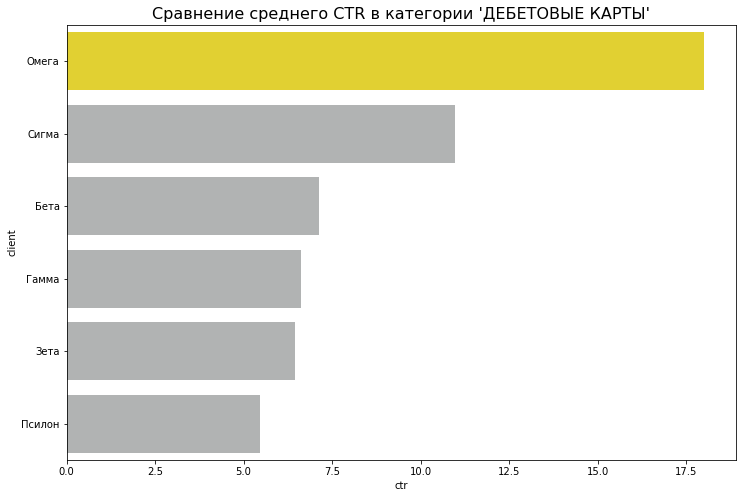

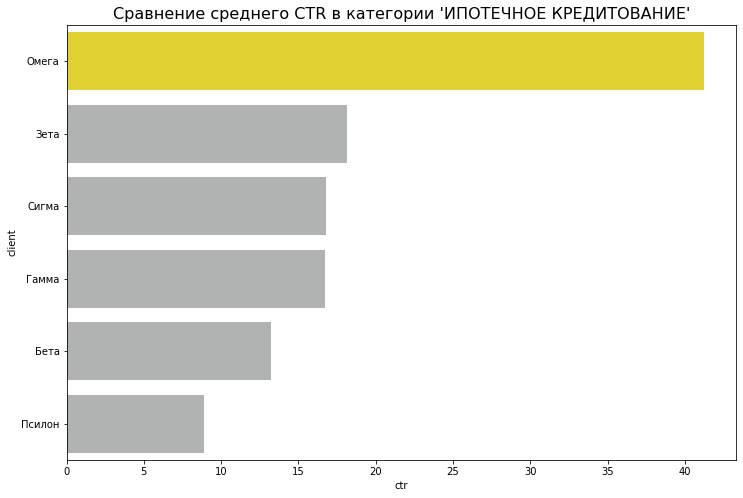

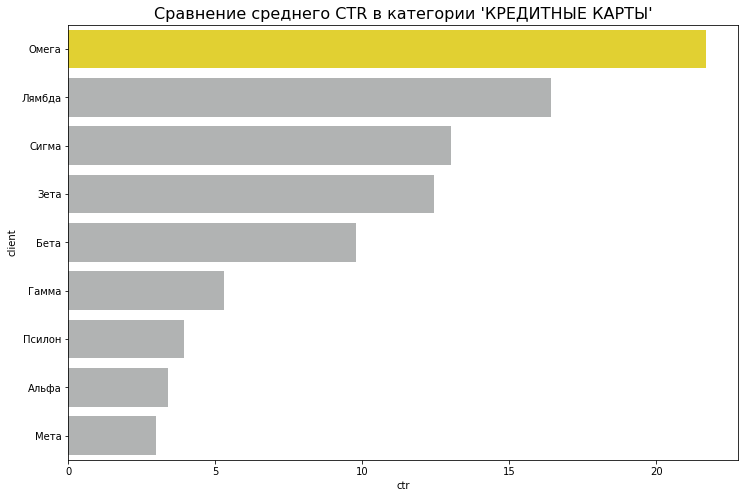

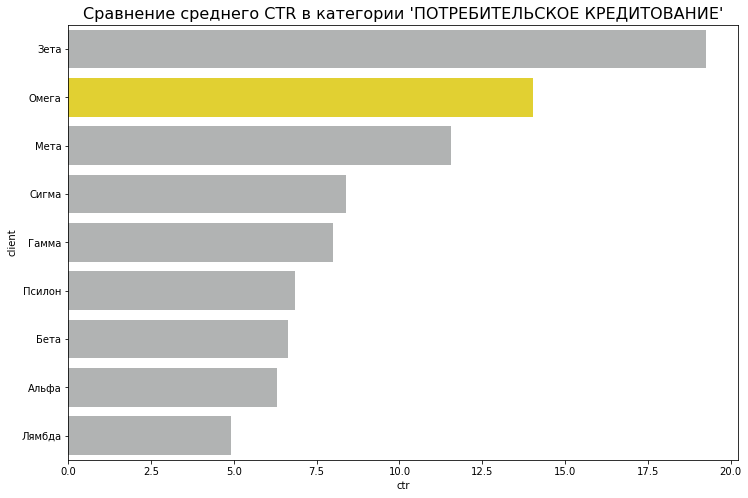

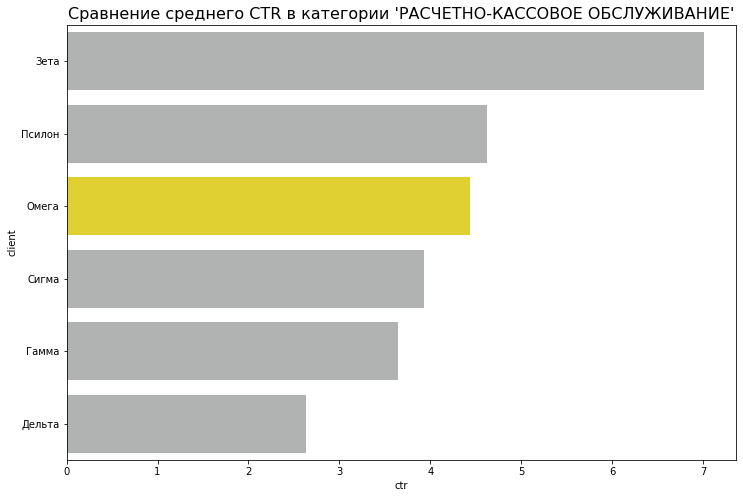

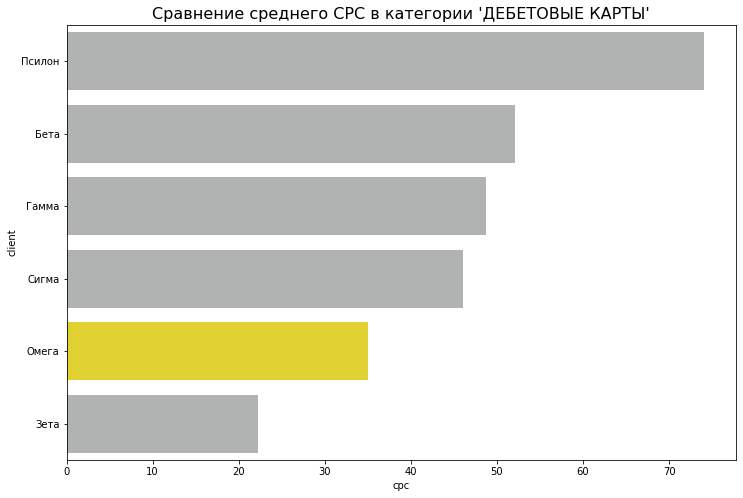

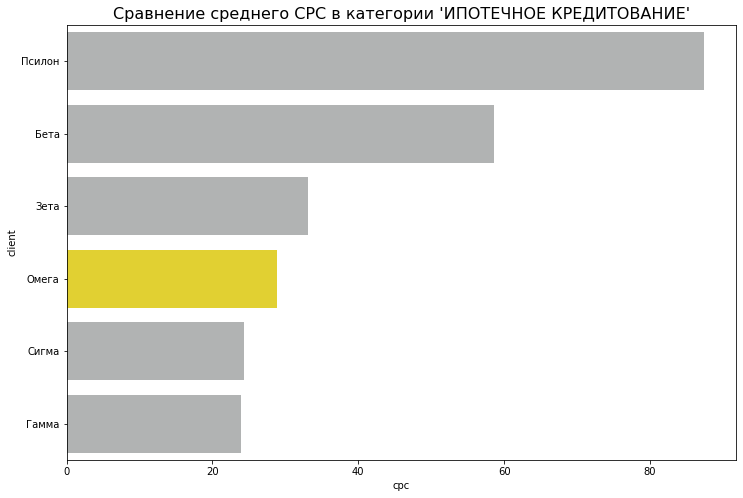

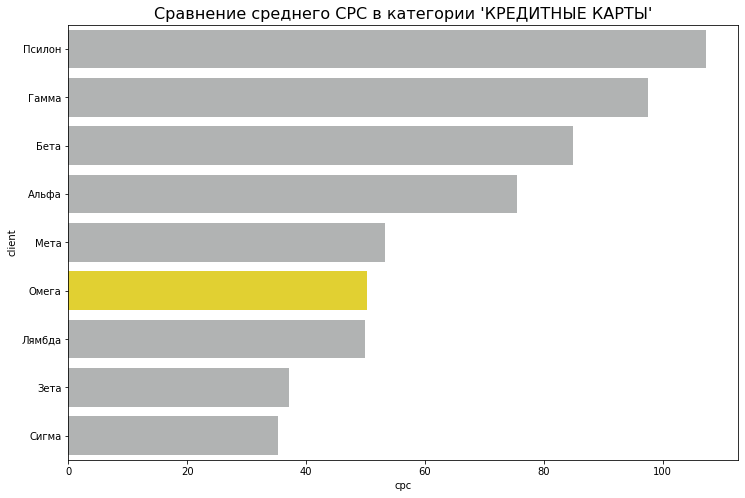

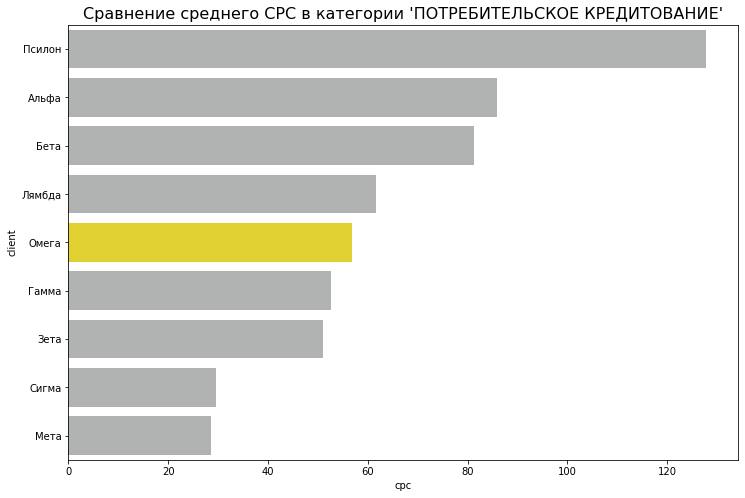

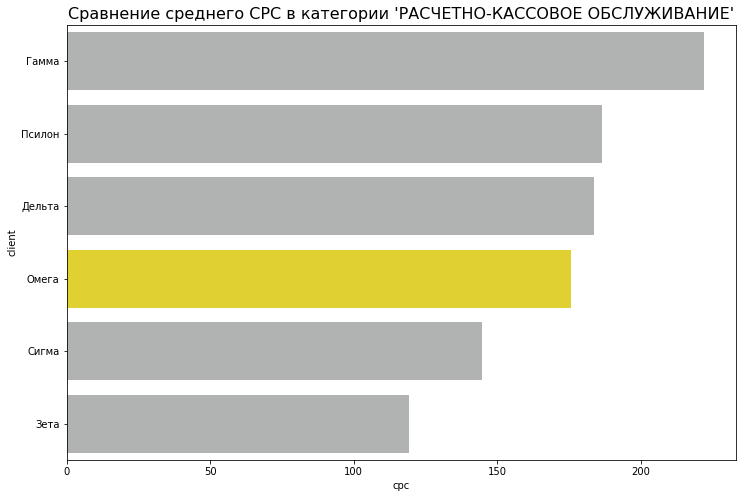

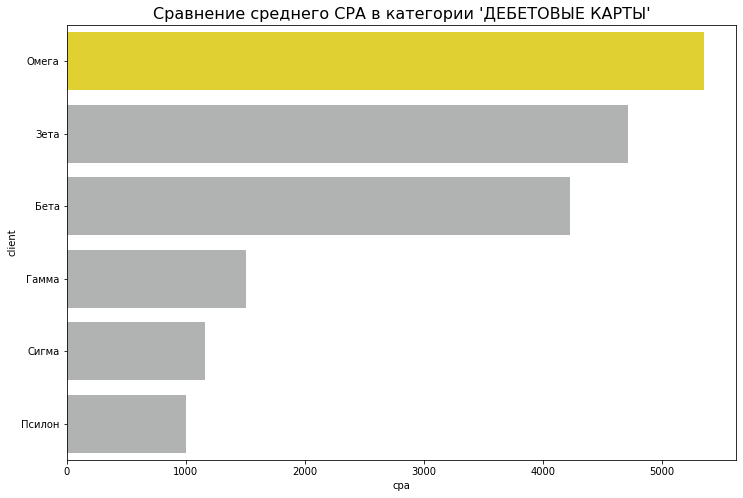

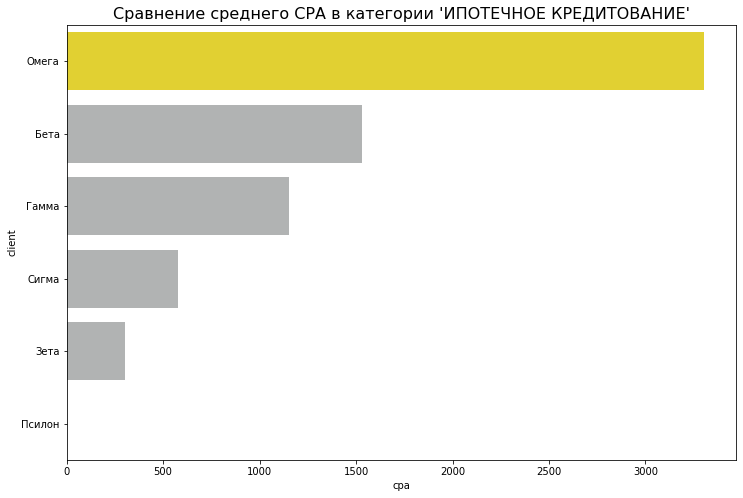

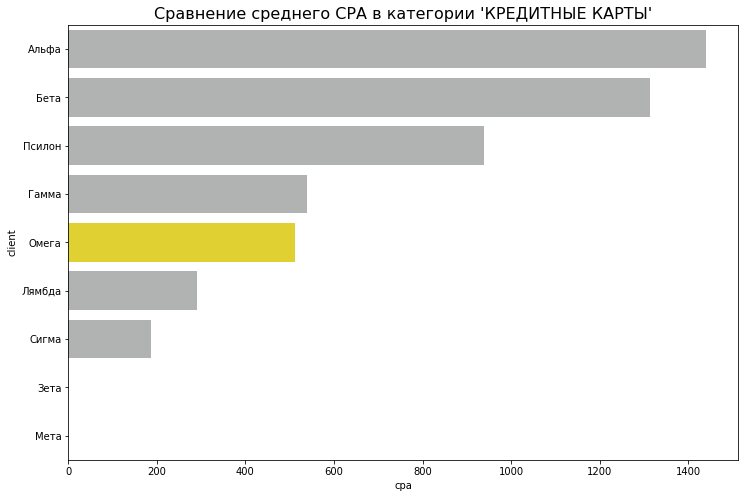

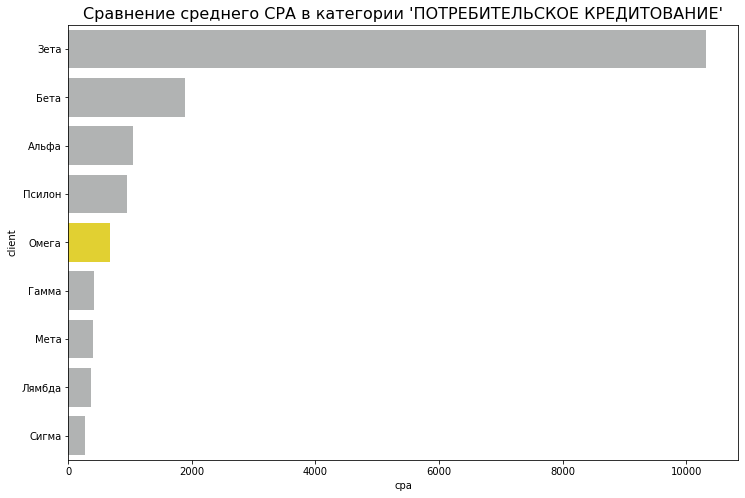

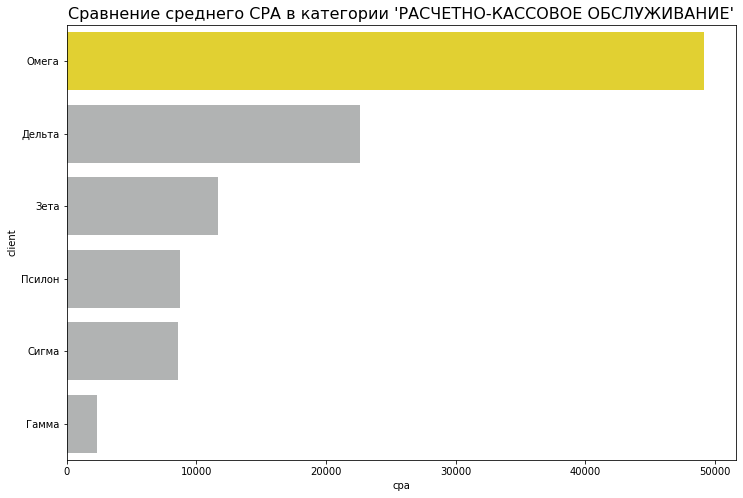

In [17]:
# вызов функции
plot_metrics(metrics_filt, metrics_lst, categories)

##### Анализ CTR

**Как подтянуть CTR в категории "потребительское кредитование"? Лидер "Зета".**

In [18]:
# список клиентов для фильтрации
lst = ['Зета', 'Омега']

In [19]:
# группировка по устройствам
df_period[df_period['category'] == 'ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ'] \
    .query('client in @lst') \
    .groupby(['client', 'device']) \
    .agg({'shows': 'sum', 'clicks': 'sum', 'ctr': 'mean'}) \
    .style.highlight_min(subset=['clicks'], color='red')

Значительно проседаем по кликам на десктопе. Из-за этого падает показатель CTR.

In [20]:
# посмотрим по местам прихода трафика
df_period[df_period['category'] == 'ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ'] \
    .query('client in @lst and device == "Desktop"') \
    .groupby(['client', 'device', 'place']) \
    .agg({'shows': 'sum', 'clicks': 'sum', 'ctr': 'mean'})

shows  clicks   ctr
client device  place                          
Зета   Desktop Networks        0       0   nan
               Search    2145302  460239 19.75
Омега  Desktop Networks        0       0   nan
               Search    2040545  249679 11.03

Видно что весь трафик приходит из поиска.

In [21]:
# посмотрим по инcтрументам ('banner_type')
df_period[df_period['category'] == 'ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ'] \
    .query('client in @lst and device == "Desktop"') \
    .groupby(['client', 'device', 'banner_type']) \
    .agg({'shows': 'sum', 'clicks': 'sum', 'ctr': 'mean'})

shows  clicks   ctr
client device  banner_type                       
Зета   Desktop cpm_banner         0       0   nan
               image_ad           0       0   nan
               text         2145302  460239 19.75
Омега  Desktop cpm_banner         0       0   nan
               image_ad           0       0   nan
               text         2040545  249679 11.03

Все клики на Desktop идут из banner_type 'text'.

In [22]:
# посмотрим по инcтрументам ('targeting_type')
df_period[df_period['category'] == 'ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ'] \
    .query('client in @lst and device == "Desktop"') \
    .groupby(['client', 'device', 'targeting_type']) \
    .agg({'shows': 'sum', 'clicks': 'sum', 'ctr': 'mean'})

shows  clicks   ctr
client device  targeting_type                       
Зета   Desktop Autotargeting         0       0   nan
               Phrase          2145302  460239 19.75
               Retargeting           0       0   nan
Омега  Desktop Autotargeting         0       0   nan
               Phrase          2040545  249679 11.03
               Retargeting           0       0   nan

Все клики на Desktop идут из targeting_type 'Phrase'.

**Как подтянуть CTR в категории "РКО"? Лидер "Зета".**

In [23]:
# список клиентов для фильтрации
lst = ['Зета', 'Омега']

In [24]:
# группировка по устройствам
df_period[df_period['category'] == 'РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ'] \
    .query('client in @lst') \
    .groupby(['client', 'device']) \
    .agg({'shows': 'sum', 'clicks': 'sum', 'ctr': 'mean'}) \
    .style.background_gradient(subset=['clicks'], cmap='Reds_r')

Проседаем по кликам на Desktop и Mobile. Из-за этого падает показатель CTR.

In [25]:
# посмотрим по местам прихода трафика
df_period[df_period['category'] == 'РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ'] \
    .query('client in @lst') \
    .groupby(['client', 'device', 'place']) \
    .agg({'shows': 'sum', 'clicks': 'sum', 'ctr': 'mean'})

shows  clicks   ctr
client device  place                           
Зета   Desktop Networks  39903672   54602  0.14
               Search     2222441  167345 10.01
       Mobile  Networks  17366492  148195  0.85
               Search     1182807  120969 10.53
Омега  Desktop Networks  24280508   40911  0.27
               Search     2161514   77414  6.77
       Mobile  Networks   8824188   69503  1.07
               Search     1009395   32844  5.78

CTR проседает на трафике приходящем из поиска как для Desktop, так и для Mobile.

In [26]:
# посмотрим по инcтрументам ('banner_type')
df_period[df_period['category'] == 'РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ'] \
    .query('client in @lst') \
    .groupby(['client', 'device', 'banner_type']) \
    .agg({'shows': 'sum', 'clicks': 'sum', 'ctr': 'mean'})

shows  clicks  ctr
client device  banner_type                       
Зета   Desktop cpm_banner      14847      22 0.15
               image_ad     13928747   17733 0.14
               text         28182519  204192 8.91
       Mobile  cpm_banner        814       5 0.61
               image_ad      9777593   95599 0.93
               text          8770892  173560 9.44
Омега  Desktop cpm_banner          0       0  nan
               image_ad       276601     652 0.34
               mcbanner       170822     178 0.04
               text         25994599  117495 7.03
       Mobile  cpm_banner          0       0  nan
               image_ad         9642     104 1.33
               mcbanner          700       1 0.03
               text          9823241  102242 5.73

CTR на Mobile banner_type 'text' меньше почти в два раза.

In [27]:
# посмотрим по инcтрументам ('targeting_type')
df_period[df_period['category'] == 'РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ'] \
    .query('client in @lst') \
    .groupby(['client', 'device', 'targeting_type']) \
    .agg({'shows': 'sum', 'clicks': 'sum', 'ctr': 'mean'})

shows  clicks  ctr
client device  targeting_type                       
Зета   Desktop Phrase           9205058  177676 8.91
               Retargeting     32921055   44271 0.14
       Mobile  Phrase           6580785  174246 9.47
               Retargeting     11968514   94918 0.81
Омега  Desktop Phrase          12635294  100075 5.71
               Retargeting     13806728   18250 0.30
       Mobile  Phrase           7408460   80930 4.92
               Retargeting      2425123   21417 1.20

СTR на Mobile targeting_type 'Phrase' меньше почти в два раза.

##### Анализ CPC

**Как подтянуть CPC в категории "потребительское кредитование"? Лидер "Мета".**

In [28]:
# список клиентов для фильтрации
lst = ['Мета', 'Омега']

In [29]:
# группировка по устройствам
df_period[df_period['category'] == 'ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ'] \
    .query('client in @lst') \
    .groupby(['client', 'device']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'clicks': 'sum', 'cpc': lambda x: round(np.mean(x), 2)}) \
    .style.background_gradient(subset=['clicks'], cmap='Reds_r')

Проседаем по кликам на Desktop и Mobile почти в два раза. Из-за этого растет показатель CPC

In [30]:
# посмотрим по местам прихода трафика
df_period[df_period['category'] == 'ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ'] \
    .query('client in @lst') \
    .groupby(['client', 'device', 'place']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'clicks': 'sum', 'cpc': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  clicks   cpc
client device  place                                  
Мета   Desktop Networks       1440734.22   92046 15.79
               Search         5931318.17  331219 37.77
       Mobile  Networks       4760805.38  501673  9.21
               Search         9849124.59  480681 40.62
Омега  Desktop Networks             0.00       0   nan
               Search        14078058.81  249679 61.91
       Mobile  Networks             0.00       0   nan
               Search        15713854.84  393536 51.65

У Омега нет дешевых кликов из Networks на Desktop и Mobile, из-за этого общая средняя цена клика растет.

In [31]:
# посмотрим по инcтрументам ('banner_type')
df_period[df_period['category'] == 'ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ'] \
    .query('client in @lst') \
    .groupby(['client', 'device', 'banner_type']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'clicks': 'sum', 'cpc': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  clicks   cpc
client device  banner_type                               
Мета   Desktop image_ad            48233.50    2604 17.62
               text              7323818.89  420661 31.39
       Mobile  image_ad           374882.50   48234  9.03
               text             14235047.46  934120 32.09
Омега  Desktop cpm_banner              0.00       0   nan
               image_ad                0.00       0   nan
               text             14078058.81  249679 61.91
       Mobile  cpm_banner              0.00       0   nan
               text             15713854.84  393536 51.65

У Омега вовсе нет дешевых кликов из image_ad на Desktop и Mobile, а клики из text на Mobile и Desktop почти в два раза дороже аналогичных кликов у Меты. Из-за этого общая средняя цена клика растет.

In [32]:
# посмотрим по инcтрументам ('targeting_type')
df_period[df_period['category'] == 'ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ'] \
    .query('client in @lst') \
    .groupby(['client', 'device', 'targeting_type']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'clicks': 'sum', 'cpc': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  clicks   cpc
client device  targeting_type                               
Мета   Desktop Phrase               7366215.03  422713 29.90
               Retargeting             5837.37     552 11.34
       Mobile  Autotargeting              0.00       0   nan
               Phrase              14544061.22  974734 29.12
               Retargeting            65868.75    7620  7.92
Омега  Desktop Autotargeting              0.00       0   nan
               Phrase              14078058.81  249679 61.91
               Retargeting                0.00       0   nan
       Mobile  Autotargeting              0.00       0   nan
               Phrase              15713854.84  393536 51.65
               Retargeting                0.00       0   nan

У Омега вовсе нет дешевых кликов из Retargeting на Desktop и Mobile, а клики из Phase на Mobile и Desktop почти в два раза дороже аналогичных кликов у Меты. Из-за этого общая средняя цена клика растет.

**Как подтянуть CPC в категории "кредитные карты"? Лидер "Сигма".**

In [33]:
# список клиентов для фильтрации
lst = ['Сигма', 'Омега']

In [34]:
# группировка по устройствам
df_period[df_period['category'] == 'КРЕДИТНЫЕ КАРТЫ'] \
    .query('client in @lst') \
    .groupby(['client', 'device']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'clicks': 'sum', 'cpc': lambda x: round(np.mean(x), 2)}) \
    .style.background_gradient(subset=['clicks'], cmap='Reds_r')

Проседаем по кликам на Desktop и Mobile. Из-за этого растет показатель CPC

In [35]:
# посмотрим по местам прихода трафика
df_period[df_period['category'] == 'КРЕДИТНЫЕ КАРТЫ'] \
    .query('client in @lst') \
    .groupby(['client', 'device', 'place']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'clicks': 'sum', 'cpc': lambda x: round(np.mean(x), 2)}) \

cost_rub_wo_nds  clicks   cpc
client device  place                                  
Омега  Desktop Networks          3003.56     119 32.37
               Search         1049021.69   26036 60.75
       Mobile  Networks         11022.41     542 18.88
               Search          898525.83   38324 45.67
Сигма  Desktop Networks       1087363.34   56526 18.43
               Search         1844690.87   49397 43.35
       Mobile  Networks       7217124.45  522591 13.46
               Search         4411513.44  149284 40.43

У Омега значительно дороже клики на Desktop Networks и Search, из-за этого общая средняя цена клика растет.

In [36]:
# посмотрим по инcтрументам ('banner_type')
df_period[df_period['category'] == 'КРЕДИТНЫЕ КАРТЫ'] \
    .query('client in @lst') \
    .groupby(['client', 'device', 'banner_type']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'clicks': 'sum', 'cpc': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  clicks   cpc
client device  banner_type                               
Омега  Desktop cpm_banner              0.00       0   nan
               image_ad               79.51       2 39.76
               text              1051945.73   26153 58.77
       Mobile  cpm_banner              0.00       0   nan
               image_ad              121.68       7 17.38
               text               909426.56   38859 44.34
Сигма  Desktop cpm_banner              0.00       0   nan
               text              2932054.21  105923 36.89
       Mobile  cpm_banner              0.00       0   nan
               image_ad                0.00       0   nan
               text             11628637.89  671875 33.68

У Омега клики из text на Desktop и Mobile почти в два раза дороже аналогичных кликов у Сигмы. Из-за этого общая средняя цена клика растет.

In [37]:
# посмотрим по инcтрументам ('targeting_type')
df_period[df_period['category'] == 'КРЕДИТНЫЕ КАРТЫ'] \
    .query('client in @lst') \
    .groupby(['client', 'device', 'targeting_type']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'clicks': 'sum', 'cpc': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  clicks   cpc
client device  targeting_type                               
Омега  Desktop Autotargeting              0.00       0   nan
               Phrase               1049021.69   26036 60.75
               Retargeting             3003.56     119 32.37
       Mobile  Autotargeting              0.00       0   nan
               Phrase                898525.83   38324 45.67
               Retargeting            11022.41     542 18.88
Сигма  Desktop Autotargeting              0.00       0   nan
               Phrase               2929917.04  105723 37.89
               Retargeting             2137.17     200 10.69
       Mobile  Autotargeting              0.00       0   nan
               Phrase              11604721.30  669166 34.60
               Retargeting            23916.59    2709  8.83

У Омега стоимость кликов из Retargeting на Desktop и Mobile в 2-3 раза дороже, а клики из Phase на Mobile и Desktop где-то в 1.5-2 раза дороже аналогичных кликов у Сигмы. Из-за этого общая средняя цена клика растет.

**Как подтянуть CPC в категории "ипотека"? Лидер "Гамма".**

In [38]:
# список клиентов для фильтрации
lst = ['Гамма', 'Омега']

In [39]:
# группировка по устройствам
df_period[df_period['category'] == 'ИПОТЕЧНОЕ КРЕДИТОВАНИЕ'] \
    .query('client in @lst') \
    .groupby(['client', 'device']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'clicks': 'sum', 'cpc': lambda x: round(np.mean(x), 2)}) \
    .style.background_gradient(subset=['clicks'], cmap='Reds_r')

Незначительно проседаем по цене клика на Desktop и Mobile. Из-за этого растет показатель CPC

In [40]:
# посмотрим по местам прихода трафика
df_period[df_period['category'] == 'ИПОТЕЧНОЕ КРЕДИТОВАНИЕ'] \
    .query('client in @lst') \
    .groupby(['client', 'device', 'place']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'clicks': 'sum', 'cpc': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  clicks   cpc
client device  place                                  
Гамма  Desktop Networks         33116.17    2040 15.23
               Search         4660150.75  126063 35.40
       Mobile  Networks        136708.73   16588  8.22
               Search         3154587.94  180142 20.74
Омега  Desktop Networks             0.00       0   nan
               Search          663166.31   19446 35.79
       Mobile  Networks             0.00       0   nan
               Search          454391.53   25208 21.85

У Омега вовсе отсутствуют дешевые клики из Networks на Desktop и Mobile, из-за этого общая средняя цена клика растет.

In [41]:
# посмотрим по инcтрументам ('banner_type')
df_period[df_period['category'] == 'ИПОТЕЧНОЕ КРЕДИТОВАНИЕ'] \
    .query('client in @lst') \
    .groupby(['client', 'device', 'banner_type']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'clicks': 'sum', 'cpc': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  clicks   cpc
client device  banner_type                               
Гамма  Desktop cpm_banner              0.00       0   nan
               dynamic                 0.00       0   nan
               image_ad             7067.20     305 16.84
               mcbanner                0.00       0   nan
               text              4686199.72  127798 32.28
       Mobile  cpm_banner              0.00       0   nan
               image_ad            22851.33    3565  7.24
               text              3268445.34  193165 19.09
Омега  Desktop cpm_banner              0.00       0   nan
               text               663166.31   19446 35.79
       Mobile  cpm_banner              0.00       0   nan
               text               454391.53   25208 21.85

У Омега нет дешевых кликов из image_ad на Desktop и Mobile. Из-за этого общая средняя цена клика растет.

In [42]:
# посмотрим по инcтрументам ('targeting_type')
df_period[df_period['category'] == 'ИПОТЕЧНОЕ КРЕДИТОВАНИЕ'] \
    .query('client in @lst') \
    .groupby(['client', 'device', 'targeting_type']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'clicks': 'sum', 'cpc': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  clicks   cpc
client device  targeting_type                               
Гамма  Desktop Autotargeting              0.00       0   nan
               Phrase               4665543.13  126534 32.05
               Retargeting            27723.79    1569 18.47
       Mobile  Autotargeting              0.00       0   nan
               Phrase               3233574.65  191388 18.69
               Retargeting            57722.02    5342 10.04
Омега  Desktop Phrase                663166.31   19446 35.79
               Retargeting                0.00       0   nan
       Mobile  Phrase                454391.53   25208 21.85
               Retargeting                0.00       0   nan

У Омега нет дешевых кликов из Retargeting на Desktop и Mobile. Из-за этого общая средняя цена клика растет.

**Как подтянуть CPC в категории "дебетовые"? Лидер "Зета".**

In [43]:
# список клиентов для фильтрации
lst = ['Зета', 'Омега']

In [44]:
# группировка по устройствам
df_period[df_period['category'] == 'ДЕБЕТОВЫЕ КАРТЫ'] \
    .query('client in @lst') \
    .groupby(['client', 'device']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'clicks': 'sum', 'cpc': lambda x: round(np.mean(x), 2)}) \
    .style.background_gradient(subset=['clicks'], cmap='Reds_r')

У Омега в два раза дороже клики на Mobile, из-за этого общая средняя цена клика растет.

In [45]:
# посмотрим по местам прихода трафика
df_period[df_period['category'] == 'ДЕБЕТОВЫЕ КАРТЫ'] \
    .query('client in @lst and device == "Mobile"') \
    .groupby(['client', 'device', 'place']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'clicks': 'sum', 'cpc': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  clicks   cpc
client device place                                  
Зета   Mobile Networks        874171.34  112510  9.67
              Search        15822318.89  824490 20.13
Омега  Mobile Networks         16845.58    2807  5.72
              Search          698073.35   22889 33.13

У Омега в 1.5 раза дороже клики из Search на Mobile, из-за этого общая средняя цена клика растет.

In [46]:
# посмотрим по инcтрументам ('banner_type')
df_period[df_period['category'] == 'ДЕБЕТОВЫЕ КАРТЫ'] \
    .query('client in @lst and device == "Mobile"') \
    .groupby(['client', 'device', 'banner_type']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'clicks': 'sum', 'cpc': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  clicks   cpc
client device banner_type                               
Зета   Mobile cpm_banner              0.00       0   nan
              image_ad           240180.73   38484  7.98
              text             16456309.50  898516 17.83
Омега  Mobile cpm_banner              0.00       0   nan
              image_ad             1448.08     269  5.38
              text               713470.86   25427 32.04

У Омега в 2 раза дороже клики из text на Mobile. Из-за этого общая средняя цена клика растет.

In [47]:
# посмотрим по инcтрументам ('targeting_type')
df_period[df_period['category'] == 'ДЕБЕТОВЫЕ КАРТЫ'] \
    .query('client in @lst and device == "Mobile"') \
    .groupby(['client', 'device', 'targeting_type']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'clicks': 'sum', 'cpc': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  clicks   cpc
client device targeting_type                               
Зета   Mobile Phrase              16314573.35  877097 18.58
              Retargeting           381916.88   59903  7.67
Омега  Mobile Phrase                714918.93   25696 31.02
              Retargeting                0.00       0   nan

У Омега нет дешевых кликов из Retargeting на Mobile и почти в 2 раза дороже клики из Phrase на Mobile. Из-за этого общая средняя цена клика растет.

**Как подтянуть CPC в категории "РКО"? Лидер "Зета".**

In [48]:
# список клиентов для фильтрации
lst = ['Зета', 'Омега']

In [49]:
# группировка по устройствам
df_period[df_period['category'] == 'РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ'] \
    .query('client in @lst') \
    .groupby(['client', 'device']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'clicks': 'sum', 'cpc': lambda x: round(np.mean(x), 2)}) \
    .style.highlight_max(subset=['cpc'], color='red')

У Омега почти в два раза дороже клики на Desktop, из-за этого общая средняя цена клика растет.

In [50]:
# посмотрим по местам прихода трафика
df_period[df_period['category'] == 'РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ'] \
    .query('client in @lst and device == "Desktop"') \
    .groupby(['client', 'device', 'place']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'clicks': 'sum', 'cpc': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  clicks    cpc
client device  place                                   
Зета   Desktop Networks       1493769.74   54602  34.25
               Search        24762830.58  167345 187.20
Омега  Desktop Networks        758417.28   40911  20.66
               Search        16769182.51   77414 317.32

У Омега в 1.7 раза дороже клики из Search на Desktop, из-за этого общая средняя цена клика растет.

In [51]:
# посмотрим по инcтрументам ('banner_type')
df_period[df_period['category'] == 'РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ'] \
    .query('client in @lst and device == "Desktop"') \
    .groupby(['client', 'device', 'banner_type']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'clicks': 'sum', 'cpc': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  clicks    cpc
client device  banner_type                                
Зета   Desktop cpm_banner           1184.04      22  53.82
               image_ad           504680.27   17733  33.88
               text             25750736.01  204192 169.59
Омега  Desktop cpm_banner              0.00       0    nan
               image_ad            14651.15     652  23.28
               mcbanner            65038.63     178 597.88
               text             17447910.01  117495 175.54

У Омега на Desktop имеются клики из mcbanner, которые почти в 6 раз дороже средней цены клика у Зеты. Из-за этого общая средняя цена клика Омеги растет.

In [52]:
# посмотрим по инcтрументам ('targeting_type')
df_period[df_period['category'] == 'РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ'] \
    .query('client in @lst and device == "Desktop"') \
    .groupby(['client', 'device', 'targeting_type']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'clicks': 'sum', 'cpc': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  clicks    cpc
client device  targeting_type                                
Зета   Desktop Phrase              25044079.28  177676 169.72
               Retargeting          1212521.04   44271  35.71
Омега  Desktop Phrase              17178697.74  100075 260.98
               Retargeting           348902.06   18250  21.47

У Омега клики на Desktop из Retargeting и Phrase приблизительно в 1.5 раза дороже аналогичных кликов у Зеты. Из-за этого общая средняя цена клика растет.

##### Анализ CPA

**Как подтянуть CPA в категории "потребительское кредитование"? Лидер "Сигма".**

In [53]:
# список клиентов для фильтрации
lst = ['Сигма', 'Омега']

In [54]:
# группировка по устройствам
df_period[df_period['category'] == 'ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ'] \
    .query('client in @lst') \
    .groupby(['client', 'device']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'сonversions': 'sum', 'cpa': lambda x: round(np.mean(x), 2)}) \
    .style.highlight_max(subset=['cpa'], color='red')

У Омега на Desktop CPA примерно в 3 раза больше, из-за этого средний CPA растет.

In [55]:
# посмотрим по местам прихода трафика
df_period[df_period['category'] == 'ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ'] \
    .query('client in @lst and device == "Desktop"') \
    .groupby(['client', 'device', 'place']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'сonversions': 'sum', 'cpa': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  сonversions    cpa
client device  place                                        
Омега  Desktop Networks             0.00         0.00    nan
               Search        14078058.81     21917.00 954.93
Сигма  Desktop Networks       3198279.06      7960.00 272.09
               Search        20807429.93     70833.00 317.33

У Омега на Desktop CPA из Search примерно в 3 раза выше, а дешевые CPA из Networks полностью отсутствуют, из-за этого средний CPA растет.

In [56]:
# посмотрим по инcтрументам ('banner_type')
df_period[df_period['category'] == 'ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ'] \
    .query('client in @lst and device == "Desktop"') \
    .groupby(['client', 'device', 'banner_type']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'сonversions': 'sum', 'cpa': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  сonversions    cpa
client device  banner_type                                     
Омега  Desktop cpm_banner              0.00         0.00    nan
               image_ad                0.00         0.00    nan
               text             14078058.81     21917.00 954.93
Сигма  Desktop cpm_banner              0.00         0.00    nan
               image_ad              254.25         0.00    nan
               mcbanner                0.00         0.00    nan
               text             24005454.74     78793.00 300.80

У Омега на Desktop CPA из text banner_type примерно в 3 раза выше чем у конкурента-лидера, из-за этого средний CPA растет.

In [57]:
# посмотрим по инcтрументам ('targeting_type')
df_period[df_period['category'] == 'ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ'] \
    .query('client in @lst and device == "Desktop"') \
    .groupby(['client', 'device', 'targeting_type']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'сonversions': 'sum', 'cpa': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  сonversions    cpa
client device  targeting_type                                     
Омега  Desktop Autotargeting              0.00         0.00    nan
               Phrase              14078058.81     21917.00 954.93
               Retargeting                0.00         0.00    nan
Сигма  Desktop Autotargeting         108699.79       493.00 182.65
               Phrase              23657867.93     77568.00 364.98
               Retargeting           239141.27       732.00 221.30

У Омега на Desktop CPA из Phrase targeting_type примерно в 3 раза выше чем у конкурента-лидера, а дешевые CPA из Autotargeting и Retargeting полностью отсутствуют, из-за этого средний CPA растет.

**Как подтянуть CPA в категории "кредитные карты"? Лидер "Сигма".**

In [58]:
# список клиентов для фильтрации
lst = ['Сигма', 'Омега']

In [59]:
# группировка по устройствам
df_period[df_period['category'] == 'КРЕДИТНЫЕ КАРТЫ'] \
    .query('client in @lst') \
    .groupby(['client', 'device']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'сonversions': 'sum', 'cpa': lambda x: round(np.mean(x), 2)}) \
    .style.background_gradient(subset=['cpa'], cmap='Reds')

У Омега на Desktop и Mobile CPA примерно в 2.5-3 раза больше, чем у лидера-конкурента

In [60]:
# посмотрим по местам прихода трафика
df_period[df_period['category'] == 'КРЕДИТНЫЕ КАРТЫ'] \
    .query('client in @lst') \
    .groupby(['client', 'device', 'place']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'сonversions': 'sum', 'cpa': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  сonversions    cpa
client device  place                                        
Омега  Desktop Networks          3003.56        14.00 208.86
               Search         1049021.69       590.00 603.13
       Mobile  Networks         11022.41        69.00  80.15
               Search          898525.83      1476.00 533.54
Сигма  Desktop Networks       1087363.34      3330.00 251.75
               Search         1844690.87     10635.00 210.84
       Mobile  Networks       7217124.45     23924.00 148.37
               Search         4411513.44     34301.00 161.66

У Омега на Desktop и на Mobile CPA из Search примерно в 3 раза выше, чем у лидера-конкурента, из-за этого средний CPA растет.

In [61]:
# посмотрим по инcтрументам ('banner_type')
df_period[df_period['category'] == 'КРЕДИТНЫЕ КАРТЫ'] \
    .query('client in @lst') \
    .groupby(['client', 'device', 'banner_type']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'сonversions': 'sum', 'cpa': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  сonversions    cpa
client device  banner_type                                     
Омега  Desktop cpm_banner              0.00         0.00    nan
               image_ad               79.51         0.00    nan
               text              1051945.73       604.00 563.70
       Mobile  cpm_banner              0.00         0.00    nan
               image_ad              121.68         1.00   0.00
               text               909426.56      1544.00 510.22
Сигма  Desktop cpm_banner              0.00         0.00    nan
               text              2932054.21     13965.00 222.71
       Mobile  cpm_banner              0.00         0.00    nan
               image_ad                0.00         0.00    nan
               text             11628637.89     58225.00 156.55

У Омега на Desktop и на Mobile CPA из text banner_type примерно в 2.5-3 раза выше чем у конкурента-лидера.

In [62]:
# посмотрим по инcтрументам ('targeting_type')
df_period[df_period['category'] == 'КРЕДИТНЫЕ КАРТЫ'] \
    .query('client in @lst') \
    .groupby(['client', 'device', 'targeting_type']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'сonversions': 'sum', 'cpa': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  сonversions    cpa
client device  targeting_type                                     
Омега  Desktop Autotargeting              0.00         0.00    nan
               Phrase               1049021.69       590.00 603.13
               Retargeting             3003.56        14.00 208.86
       Mobile  Autotargeting              0.00         0.00    nan
               Phrase                898525.83      1477.00 500.20
               Retargeting            11022.41        68.00 160.30
Сигма  Desktop Autotargeting              0.00         0.00    nan
               Phrase               2929917.04     13957.00 221.23
               Retargeting             2137.17         8.00 267.15
       Mobile  Autotargeting              0.00         0.00    nan
               Phrase              11604721.30     58151.00 177.21
               Retargeting            23916.59        74.00  62.12

У Омега на Desktop и на Mobile CPA из Phrase targeting_type примерно в 2.5-3 раза выше чем у конкурента-лидера, а CPA на Mobile из Retargeting выше в 2.6 раза, из-за этого средний CPA растет.

**Как подтянуть CPA в категории "ипотека"? Лидер "Зета".**

In [63]:
# список клиентов для фильтрации
lst = ['Зета', 'Омега']

In [64]:
# группировка по устройствам
df_period[df_period['category'] == 'ИПОТЕЧНОЕ КРЕДИТОВАНИЕ'] \
    .query('client in @lst') \
    .groupby(['client', 'device']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'сonversions': 'sum', 'cpa': lambda x: round(np.mean(x), 2)}) \
    .style.background_gradient(subset=['cpa'], cmap='Reds')

У Омега на Desktop CPA примерно в 20 раз больше, а на Mobile CPA примерно в 6 раз больше чем у лидера-конкурента.

In [65]:
# посмотрим по местам прихода трафика
df_period[df_period['category'] == 'ИПОТЕЧНОЕ КРЕДИТОВАНИЕ'] \
    .query('client in @lst') \
    .groupby(['client', 'device', 'place']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'сonversions': 'sum', 'cpa': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  сonversions     cpa
client device  place                                         
Зета   Desktop Networks             0.00        18.00    0.00
               Search        20569589.85    150982.00  257.08
       Mobile  Networks             0.00        38.00    0.00
               Search        21572142.54    120429.00  468.55
Омега  Desktop Networks             0.00         0.00     nan
               Search          663166.31      1360.00 4253.84
       Mobile  Networks             0.00         0.00     nan
               Search          454391.53      1260.00 2312.53

У Омега на Desktop и на Mobile CPA из Search примерно в 16 и в 5 раза выше соответственно, чем у лидера-конкурента.

In [66]:
# посмотрим по инcтрументам ('banner_type')
df_period[df_period['category'] == 'ИПОТЕЧНОЕ КРЕДИТОВАНИЕ'] \
    .query('client in @lst') \
    .groupby(['client', 'device', 'banner_type']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'сonversions': 'sum', 'cpa': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  сonversions     cpa
client device  banner_type                                      
Зета   Desktop cpm_banner              0.00         0.00     nan
               image_ad                0.00        18.00    0.00
               mcbanner                0.00         0.00     nan
               text             20569589.85    150982.00  257.08
       Mobile  cpm_banner              0.00         0.00     nan
               image_ad                0.00        38.00    0.00
               text             21572142.54    120429.00  468.55
Омега  Desktop cpm_banner              0.00         0.00     nan
               text               663166.31      1360.00 4253.84
       Mobile  cpm_banner              0.00         0.00     nan
               text               454391.53      1260.00 2312.53

У Омега на Desktop и на Mobile CPA из text banner_type примерно в 16 и в 5 раза выше соответственно, чем у лидера-конкурента.

In [67]:
# посмотрим по инcтрументам ('targeting_type')
df_period[df_period['category'] == 'ИПОТЕЧНОЕ КРЕДИТОВАНИЕ'] \
    .query('client in @lst') \
    .groupby(['client', 'device', 'targeting_type']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'сonversions': 'sum', 'cpa': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  сonversions     cpa
client device  targeting_type                                      
Зета   Desktop Phrase              20569589.85    151000.00  212.76
               Retargeting                0.00         0.00     nan
       Mobile  Phrase              21572142.54    120467.00  387.76
               Retargeting                0.00         0.00     nan
Омега  Desktop Phrase                663166.31      1360.00 4253.84
               Retargeting                0.00         0.00     nan
       Mobile  Phrase                454391.53      1260.00 2312.53
               Retargeting                0.00         0.00     nan

У Омега на Desktop и на Mobile CPA из Phrase targeting_type примерно в 20 и в 6 раза выше соответственно, чем у лидера-конкурента.

**Как подтянуть CPA в категории "дебетовые карты"? Лидер "Псилон".**

In [68]:
# список клиентов для фильтрации
lst = ['Псилон', 'Омега']

In [69]:
# группировка по устройствам
df_period[df_period['category'] == 'ДЕБЕТОВЫЕ КАРТЫ'] \
    .query('client in @lst') \
    .groupby(['client', 'device']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'сonversions': 'sum', 'cpa': lambda x: round(np.mean(x), 2)}) \
    .style.background_gradient(subset=['cpa'], cmap='Reds')

У Омега на Desktop CPA примерно в 7 раз больше, а на Mobile CPA примерно в 4 раза больше чем у лидера-конкурента.

In [70]:
# посмотрим по местам прихода трафика
df_period[df_period['category'] == 'ДЕБЕТОВЫЕ КАРТЫ'] \
    .query('client in @lst') \
    .groupby(['client', 'device', 'place']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'сonversions': 'sum', 'cpa': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  сonversions     cpa
client device  place                                         
Омега  Desktop Networks          6646.93         0.00     nan
               Search          729642.71      1623.00 7199.98
       Mobile  Networks         16845.58         0.00     nan
               Search          698073.35      2160.00 3843.37
Псилон Desktop Networks       7324911.76      7728.00  911.53
               Search        18109460.94     29242.00 1121.72
       Mobile  Networks      17924599.81     22543.00 1013.51
               Search        24819214.78     61335.00  910.88

У Омега на Desktop и на Mobile CPA только из Search и высокой стоимости, в то время как у лидера-конкурента CPA одной равной относительной низкой стоимости как из Search, так и из Networks.

In [71]:
# посмотрим по инcтрументам ('banner_type')
df_period[df_period['category'] == 'ДЕБЕТОВЫЕ КАРТЫ'] \
    .query('client in @lst') \
    .groupby(['client', 'device', 'banner_type']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'сonversions': 'sum', 'cpa': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  сonversions     cpa
client device  banner_type                                      
Омега  Desktop cpm_banner              0.00         0.00     nan
               image_ad               87.86         0.00     nan
               text               736201.78      1623.00 7199.98
       Mobile  cpm_banner              0.00         0.00     nan
               image_ad             1448.08         0.00     nan
               text               713470.86      2160.00 3843.37
Псилон Desktop cpm_banner              0.00         5.00    0.00
               image_ad           241283.34       312.00  800.44
               mcbanner          2037012.40      2172.00 1051.77
               performance         21473.91         1.00    0.00
               text             23134603.05     34480.00 1255.22
       Mobile  cpm_banner              0.00         1.00    0.00
               image_ad           689099.21       954.00  786.43
               mcbanner            15580.52        19.00  540.26
               performance         41606.79         0.00     nan
               text             41997528.07     82904.00 1162.26

У Омега на Desktop и на Mobile CPA из text banner_type примерно в 6 и в 3 раза выше соответственно, чем у лидера-конкурента. Также лидер-конкурент имеет источники относительно недорогого CPA из image_ad и mcbanner banner_type.

In [72]:
# посмотрим по инcтрументам ('targeting_type')
df_period[df_period['category'] == 'ДЕБЕТОВЫЕ КАРТЫ'] \
    .query('client in @lst') \
    .groupby(['client', 'device', 'targeting_type']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'сonversions': 'sum', 'cpa': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  сonversions     cpa
client device  targeting_type                                      
Омега  Desktop Autotargeting              0.00         0.00     nan
               Phrase                736289.64      1623.00 7199.98
               Retargeting                0.00         0.00     nan
       Mobile  Phrase                714918.93      2160.00 3843.37
               Retargeting                0.00         0.00     nan
Псилон Desktop Autotargeting              0.00         0.00     nan
               Phrase              21323557.24     33732.00 1052.89
               Retargeting          4110815.46      3238.00  967.89
       Mobile  Autotargeting              0.00         0.00     nan
               Phrase              32531532.66     72109.00 1006.52
               Retargeting         10212281.93     11769.00  816.34

У Омега на Desktop и на Mobile CPA из Phrase targeting_type примерно в 7 и в 4 раза выше соответственно, чем у лидера-конкурента. Также лидер-конкурент имеет источники относительно недорогого CPA из Retargeting.

**Как подтянуть CPA в категории "РКО"? Лидер "Гамма".**

In [73]:
# список клиентов для фильтрации
lst = ['Гамма', 'Омега']

In [74]:
# группировка по устройствам
df_period[df_period['category'] == 'РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ'] \
    .query('client in @lst') \
    .groupby(['client', 'device']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'сonversions': 'sum', 'cpa': lambda x: round(np.mean(x), 2)}) \
    .style.background_gradient(subset=['cpa'], cmap='Reds')

У Омега на Desktop CPA примерно в 17 раз больше, а на Mobile CPA примерно в 27 раз больше чем у лидера-конкурента.

In [75]:
# посмотрим по местам прихода трафика
df_period[df_period['category'] == 'РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ'] \
    .query('client in @lst') \
    .groupby(['client', 'device', 'place']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'сonversions': 'sum', 'cpa': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  сonversions      cpa
client device  place                                          
Гамма  Desktop Networks         81397.33        28.00  2810.05
               Search        18223098.07     18922.00  2411.32
       Mobile  Networks        291308.94        84.00  6052.21
               Search         8196245.00     12256.00  1381.79
Омега  Desktop Networks        758417.28        28.00 43862.25
               Search        16769182.51       946.00 40439.78
       Mobile  Networks        576524.15        13.00 47920.34
               Search         6476985.49       350.00 61569.99

У Омега на Desktop и на Mobile CPA по разным местам прихода трафика отличается в диапазоне 8-45 раз.

In [76]:
# посмотрим по инcтрументам ('banner_type')
df_period[df_period['category'] == 'РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ'] \
    .query('client in @lst') \
    .groupby(['client', 'device', 'banner_type']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'сonversions': 'sum', 'cpa': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  сonversions      cpa
client device  banner_type                                       
Гамма  Desktop cpm_banner              0.00         0.00      nan
               image_ad             2131.82         0.00      nan
               mcbanner           498870.55       267.00  3381.64
               text             17803493.03     18683.00  1917.22
       Mobile  cpm_banner              0.00         0.00      nan
               image_ad            92263.60        16.00 11003.43
               mcbanner             3184.63         1.00   822.65
               text              8392105.72     12323.00  1561.33
Омега  Desktop cpm_banner              0.00         0.00      nan
               image_ad            14651.15         0.00      nan
               mcbanner            65038.63         1.00  1118.54
               text             17447910.01       973.00 43004.94
       Mobile  cpm_banner              0.00         0.00      nan
               image_ad              796.14         0.00      nan
               mcbanner              285.33         0.00      nan
               text              7052428.17       363.00 59964.15

У Омега на Desktop и на Mobile CPA из text banner_type примерно в 22 и в 38 раз выше соответственно, чем у лидера-конкурента. Также лидер-конкурент имеет источники относительно недорогого CPA из mcbanner banner_type для Mobile.

In [77]:
# посмотрим по инcтрументам ('targeting_type')
df_period[df_period['category'] == 'РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ'] \
    .query('client in @lst') \
    .groupby(['client', 'device', 'targeting_type']) \
    .agg({'cost_rub_wo_nds': lambda x: round(sum(x), 2), 'сonversions': 'sum', 'cpa': lambda x: round(np.mean(x), 2)})

cost_rub_wo_nds  сonversions      cpa
client device  targeting_type                                       
Гамма  Desktop Autotargeting          88386.20        64.00  1575.13
               Phrase              18137583.29     18860.00  2436.17
               Retargeting            78525.91        26.00  3766.73
       Mobile  Autotargeting         130705.52        39.00  3307.76
               Phrase               8205111.05     12244.00  2057.79
               Retargeting           151737.37        57.00  2473.85
Омега  Desktop Phrase              17178697.74       957.00 42083.99
               Retargeting           348902.06        17.00 35182.45
       Mobile  Phrase               6893506.25       363.00 59964.15
               Retargeting           160003.39         0.00      nan

У Омега на Desktop и на Mobile CPA весь targeting_type очень дорогой в сравнении с лидером-конкурентом и нуждается в оптимизации по каждой позиции.

##### Результаты исследования

* Было проведено сравнение средних CTR, CPC, CPA нашего клиента «Омега» с конкурентами по разным категориям
* У нашего клиента один из лучших средних показателей CTR в большинстве категорий
* Показатели CPC нашего клиента в среднем находятся на 3-4 местах в сравнении с конкурентами
* Показатели CPA нашего клиента в трёх категориях (РКО, дебетовые карты, ипотечное кредитование) имеют наихудшие показатели и в двух категориях (потребительские кредиты и кредитные карты) находятся на 3-4 местах в сравнении с конкурентами
* Рекомендации по улучшению показаний основываясь на анализе данных конкурентов-лидеров приведены выше.

